In [1]:
from scipy import *
from qutip import *
from matplotlib import *
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib import cm

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

S-параметр резонатора: 

$S_{21} = a e^{i\alpha} e^{-2\pi i f \tau} \bigg[1 - \frac{(Q_{l}|Q_{c}|)e^{i\phi}}{1 + 2iQ_{l}(f/f_{r}-1) } \bigg]$

Here, f denotes  theprobe  frequency, $f_{r}$ the  resonance  frequency, $Q_{l}$ the loaded and |$Q_{c}$| the absolute value of the coupling quality factor and $\phi$ quantifies the impedance mismatch. The environment is  accounted  for  by  adding  an  additional amplitudea, a phase shift $\alpha$ and the electronic delay $\tau$
caused by the length of the cable and finite speed of light. f - частота 1 тона, подаваемыйй сигнал, зависимость его от S. $f_{r}$ - резонансная частота резонатора

DIspersive approximation hamiltonian:

$H = (\omega_{r} + \chi \sigma_{z})(a^{\dagger}a+\frac{1}{2}) + \frac{\omega_{q}'}{2}\sigma_{z}$

где $\chi = g^{2}/\Delta$ is the qubit-state dependent frequency shift, a socalled “dispersive shift”. $\omega_{q}' = \omega_{q} + \chi$ 

In [38]:
#parametrs
n = 1000
e = 1.6e-19
Fi0 = 2e-15

fr0 = 6e9 #resonator freq
g = 50e6 # coupling stranght
M = 2*pi*1e-11

C_J = 90e-15
C_sh = 90e-15
C_tot = C_J + C_sh
OmQ = 5.3e9 #qubit freq

E_C = 200e6    #e*e/(2*C_tot)
alpha = -1*E_C #anharmonicity

Current = np.linspace(-1e-4, 1e-4, n)
Frequency = np.linspace(5.99e9, 6.0025e9, n)

E_J_max = (5.3e9+E_C)**2/(8*E_C)


def Chi(Current): 
    Fi = Current*M #поток внешнего поля
    E_J = abs(E_J_max*np.cos(Fi/Fi0))
    omegaP = sqrt(8*E_C*E_J) #плазменная частота 
    omegaEG = omegaP - E_C # частота перехода кубита
    Delta = np.abs(2*pi*Frequency - omegaEG)# отстройка частоты кубита от частоты резонатора
    Chi = g*g/Delta*(1/(1+Delta/alpha))#dispersive shift
    return Chi


def fr(Current, disp = True):
    if disp:
        fr = fr0 + Chi(Current)*1e4
    else: 
        fr = fr0
    return fr
    
Ql = 3e3
Qc = 2.9e3

#alpha = 0.
tau = 10.**(-10)
phi = 0.
a = 1.

def fS21(f, Current): 
    A = a * exp(1j * alpha) * exp(-2*pi*1j*f*tau)
    Qdel = (Ql/abs(Qc))*exp(1j*phi)
    fdel = f/fr(Current) - 1
    Z = 1+2*1j*Ql*fdel
    ideal = 1 - Qdel/Z
    fS21 = A*ideal
    return fS21

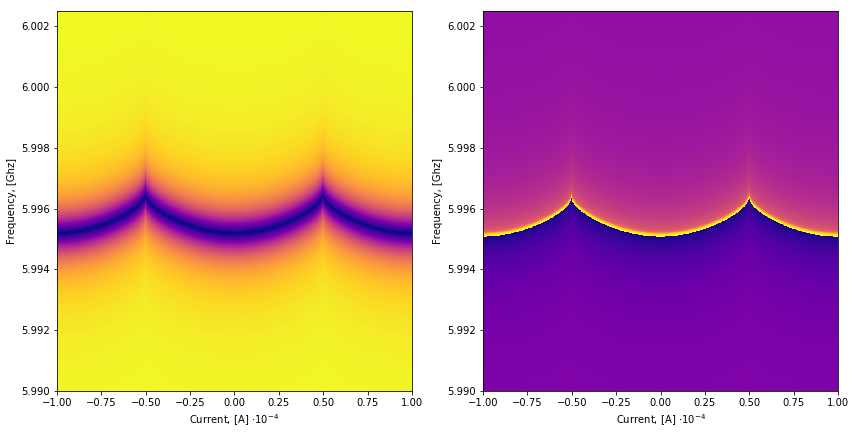

In [39]:
#Symmetric transmon
S21 = np.zeros((n,n))

XX, YY = np.meshgrid(Frequency, Current)

S21abs_r = np.abs(fS21(XX,YY))
S21arg_r = np.angle(fS21(XX,YY))

fig, ax = plt.subplots(1,2)
fig.set_figwidth(14)    
fig.set_figheight(7)  

ax[0].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[0].set_ylabel('Frequency, [Ghz]')
ax[1].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[1].set_ylabel('Frequency, [Ghz]')


ax[0].pcolormesh(Current*1e4, Frequency*1e-9, S21abs_r.T, cmap='plasma')
ax[1].pcolormesh(Current*1e4, Frequency*1e-9, S21arg_r.T, cmap='plasma')
#z = ax[0].colorbar()

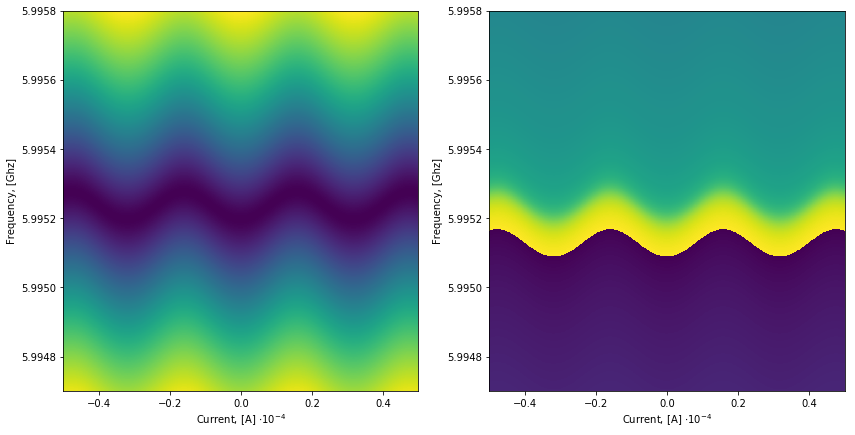

In [50]:
#Asymmetric transmon E_J1 = a E_J2
Current = np.linspace(-0.5e-4, 0.5e-4, n)
Frequency = np.linspace(5.9947e9, 5.9958e9, n)

a = 0.05
E_J1 = E_J_max/(1+a)
E_J2 = a*E_J1


def Chi(Current): 
    Fi = pi*Current*M/Fi0 #поток внешнего поля
    E_Jp = E_J1+E_J2
    E_Jm = E_J1-E_J2
    d = E_Jm/E_Jp #SQUID asymmetry
    E_J = abs(E_J_max*np.cos(Fi)*sqrt(1+d**2*tan(Fi)**2))
    omegaP = sqrt(8*E_C*E_J) #плазменная частота 
    omegaEG = omegaP - E_C # частота перехода кубита
    Delta = np.abs(2*pi*Frequency - omegaEG)# отстройка частоты кубита от частоты резонатора
    Chi = g*g/Delta*(1/(1+Delta/alpha))#dispersive shift
    return Chi


S21 = np.zeros((n,n))

XX, YY = np.meshgrid(Frequency, Current)
S21abs_r = np.abs(fS21(XX,YY))
S21arg_r = np.angle(fS21(XX,YY))

fig, ax = plt.subplots(1,2)
fig.set_figwidth(14)    
fig.set_figheight(7)  

ax[0].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[0].set_ylabel('Frequency, [Ghz]')
ax[1].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[1].set_ylabel('Frequency, [Ghz]')


ax[0].pcolormesh(Current*1e4, Frequency*1e-9, S21abs_r.T)
ax[1].pcolormesh(Current*1e4, Frequency*1e-9, S21arg_r.T)
#z = ax[0].colorbar()
